## Problem 

### Problem statement
A resource extraction company requires a robust solution to forecast monthly production for various commodities, including gas and oil. This involves leveraging historical data and analytics techniques to provide accurate predictions for future production levels.

#### Sub-Problems

- Develop a unified forecasting model capable of predicting monthly production for different commodities, such as gas and oil.
- Determine the most effective approach to integrate seasonal and trend components into the forecasting model.

_Importance_: Accurate production forecasting is critical for oil and gas companies as it enables them to optimize production schedules, plan resource allocation, and make informed business decisions. It also helps in estimating future revenue and profitability.

_Approach_: The forecasting problem can be approached using time series analysis techniques such as SARIMA (Seasonal Autoregressive Integrated Moving Average) modeling. These models are suitable for capturing the seasonal and trend components present in production data.

_Steps to Solving the Problem:_
* Exploratory Data Analysis (EDA): Explore the data.
* Model Selection: Choose appropriate time series models (e.g., SARIMA) for gas and oil production forecasting.
* Model Training: Fit the selected models to the historical data.
* Model Evaluation: Evaluate model performance using metrics such as AIC (Akaike Information Criterion).
* Forecasting: Generate forecasts for future gas and oil production based on the trained models.
* Validation: Validate the forecasted values against actual production data where available.
* Reporting: Communicate the results and insights obtained from the analysis in a clear and concise manner.


_Explanation of AIC:_
The Akaike Information Criterion (AIC) is a measure of the relative quality of statistical models for a given set of data. It balances the goodness of fit of the model with the complexity of the model, penalizing overly complex models. A lower AIC value indicates a better trade-off between model fit and complexity.

# Results

The AIC for the oil production model is `398.27`
The AIC for the gas production model is `502.293`
It can be said that the oil production model has a better fit relative to the number of parameters than the gas production model, as both models have the same number of parameters. 

Looking at the trends in the production data:

_Oil Production Trend:_

* `Historical Trend:` The historical data for oil production (liquids) shows a declining trend over time, indicating a potential decrease in production levels.
* `Forecast Accuracy:` The forecasted values for oil production closely align with the historical data, suggesting that the model effectively captures the underlying trend and dynamics of oil production.

_Gas Production Trend:_

* `Historical Trend:` Similar to oil production, the gas production data also exhibits a declining trend over time.
* `Forecast Accuracy:` While the forecasted values for gas production generally follow the historical trend, there are instances where the model's forecasts deviate from the actual data, leading to a higher AIC value.

### Recommendations
- `Diverging Trends:` The declining trends in both oil and gas production indicate potential challenges in maintaining production levels over time. It's crucial for the company to assess the underlying factors contributing to these trends
- `Resource Allocation:` Given the declining trends in production, the company should carefully allocate resources and investments to optimize production efficiency and mitigate the impact of declining reserves.
- `Regular Review:` Continuously monitor production trends and model performance to identify any deviations or emerging patterns promptly. This allows for proactive adjustments to production strategies and forecasting models.

# Assumptions made

* `Availability of Historical Data`: Assumed that sufficient historical production data is available for model training.
* `Stationarity`: Assumed that the time series data for gas and oil production is stationary or can be made stationary through appropriate transformations.
* `Model Validity`: Assumed that the chosen SARIMA models are appropriate for capturing the underlying patterns in the production data.

# Limitations

* `Data Quality:` The accuracy of production forecasts heavily relies on the quality and completeness of historical data. Inaccurate or incomplete data may lead to biased predictions and reduced forecast accuracy.
* `External Factors:` Production forecasts may be influenced by external factors beyond the scope of historical data. These factors may introduce uncertainty and limit the predictive capabilities of the forecasting model.

# DATA

## Exploratory Data Analysis

In [1]:
# Import 
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pathlib import Path
datapath = Path('data')

In [4]:
#read produciton data excel
production_data_df = pd.read_excel(datapath/ Path('Production Data.xlsx'))
metadata_df = pd.read_excel(datapath/ Path('Metadata.xlsx'))


In [5]:
# merged files
metadata_columns_to_keep = ['API_UWI'] + [col for col in metadata_df.columns if col not in production_data_df.columns]
metadata_df_selected = metadata_df[metadata_columns_to_keep]
merged_df = pd.merge(production_data_df, metadata_df_selected, on='API_UWI', how='inner')
# sort df
sort_df = merged_df.sort_values(by=['API_UWI', 'TotalProdMonths'])
# drop duplicates and drop NA columns
sort_df = sort_df.loc[:, ~sort_df.columns.duplicated()]
sort_df = sort_df.dropna(axis=1, how='all')

In [6]:
# Select columns to use and remain these columns
columns_keep = [    'API_UWI', "TotalProdMonths",'LiquidsProd_BBL', 'Proppant_LBS',
                    'TVD_FT', 'MD_FT', 'LateralLength_FT',
                    'WaterIntensity_GALPerFT',
                    'PerfInterval_FT', 'ProppantIntensity_LBSPerFT',
                    'GasProd_MCF','WaterProd_BBL',
                ]
df = sort_df[columns_keep]

In [7]:
# Check NA and drop the columns that have too many NA
df.isna().sum()

API_UWI                          0
TotalProdMonths                  0
LiquidsProd_BBL                  0
Proppant_LBS                  3111
TVD_FT                          63
MD_FT                         1437
LateralLength_FT                 0
WaterIntensity_GALPerFT       4042
PerfInterval_FT                438
ProppantIntensity_LBSPerFT    3577
GasProd_MCF                      0
WaterProd_BBL                    0
dtype: int64

In [8]:
# Add mean value to some columns 
add_mean=['TVD_FT','MD_FT',
    "Proppant_LBS",
    "PerfInterval_FT",
    "ProppantIntensity_LBSPerFT",
    "WaterIntensity_GALPerFT" ]
for col in add_mean:
    df[col].fillna(value=df[col].mean(), inplace=True)

C:\Users\79099\AppData\Local\Temp\ipykernel_8736\1055300304.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(value=df[col].mean(), inplace=True)


In [9]:
# Sort by API_UWI, totalprodmonths
df = df.sort_values(by=['API_UWI', 'TotalProdMonths'])

In [10]:
# make sure all the wells for tranning are more than 4 years and less than 7 years
four_years_df = df.groupby('API_UWI').filter(lambda x: x['TotalProdMonths'].max() >= 48)
fourToSeven_well = four_years_df[four_years_df['TotalProdMonths'] <= 84]
fourToSeven_well = fourToSeven_well[four_years_df['TotalProdMonths'] >= 48]

C:\Users\79099\AppData\Local\Temp\ipykernel_8736\2318041737.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fourToSeven_well = fourToSeven_well[four_years_df['TotalProdMonths'] >= 48]


In [11]:
# calculate the average of remaining columns based on 'TotalProdMonths'
df_without_well_id = fourToSeven_well.drop(columns=['API_UWI']) 
avg_df = df_without_well_id.groupby('TotalProdMonths').mean()
avg_df

,LiquidsProd_BBL,Proppant_LBS,TVD_FT,MD_FT,LateralLength_FT,WaterIntensity_GALPerFT,PerfInterval_FT,ProppantIntensity_LBSPerFT,GasProd_MCF,WaterProd_BBL
TotalProdMonths,,,,,,,,,,
48,2665.448065,1.462449e+07,11454.789206,18083.908350,6371.601833,1897.823358,6284.611586,2320.946398,9854.547862,9503.461303
49,2623.134108,1.444977e+07,11457.959873,18021.593453,6306.646251,1897.854799,6216.182236,2319.010116,9536.154171,9202.211193
50,2563.727273,1.421973e+07,11462.136364,17894.677384,6175.155211,1896.308753,6084.792215,2325.713744,9536.049889,9120.858093
51,2457.956069,1.406655e+07,11466.960694,17842.904046,6119.853179,1892.266468,6032.820321,2321.130651,9004.879769,8898.294798
52,2399.418577,1.395024e+07,11479.802171,17807.387214,6073.710495,1887.622405,5980.414448,2320.751524,8636.662244,8551.224367
53,2362.146250,1.391461e+07,11465.278750,17772.633750,6054.105000,1889.756217,5965.759472,2318.510017,8362.867500,8577.856250
54,2280.027815,1.384479e+07,11459.552318,17747.301987,6035.786755,1887.455594,5945.429904,2314.541740,8258.948344,8261.649007
55,2271.146165,1.394929e+07,11448.755427,17772.632417,6074.908828,1891.344390,5975.734555,2319.228987,8097.164978,8347.341534
56,2200.497006,1.380974e+07,11456.633234,17707.690120,6002.823353,1898.955050,5906.731404,2319.292261,7864.850299,8342.161677


In [12]:
# Define SARIMA model for forecasting oil production
model_oil = SARIMAX(avg_df['LiquidsProd_BBL'], order=(2, 1, 2), seasonal_order=(0, 0, 0, 3))

C:\Users\79099\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\79099\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [13]:
# Fit the model to obtain the results
results_oil = model_oil.fit()

In [14]:
# Generate predictions using the fitted SARIMA model
avg_df['predictions_oil'] = results_oil.predict(start=1, end=36)

In [15]:
# Generate a forecast for the next 12 time steps
forecast_oil = results_oil.forecast(steps=12)
print(forecast_oil)

37    1239.052769
38    1204.714247
39    1169.581364
40    1134.773014
41    1100.069050
42    1065.511975
43    1031.092779
44     996.812556
45     962.670423
46     928.665887
47     894.798381
48     861.067356
Name: predicted_mean, dtype: float64


C:\Users\79099\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\79099\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [16]:
# Combine the predicted oil production values and forecasted values into a DataFrame
oil_pred = avg_df['predictions_oil']
concatenated_series = pd.concat([oil_pred, forecast_oil]).reset_index(drop=True)
concatenated_df = concatenated_series.to_frame()
concatenated_df.index = range(48, 48 + len(concatenated_df))
concatenated_df.columns = ['oil_pred']
concatenated_df

,oil_pred
48,NaN
49,2667.108160
50,2622.935435
51,2544.738943
52,2429.730344
53,2346.447584
54,2298.441555
55,2230.361401
56,2198.780584
57,2149.972938


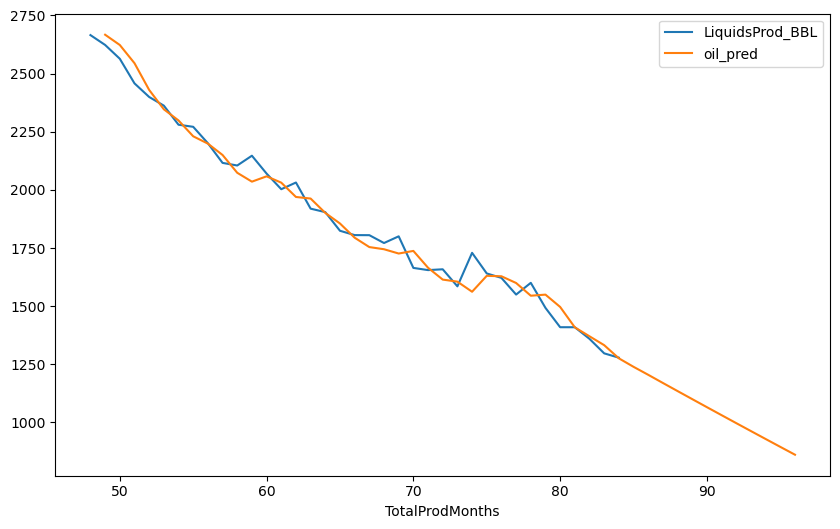

In [17]:
# Plot the actual oil production values and the predicted values 
fig, ax = plt.subplots(figsize=(10, 6))  
avg_df[['LiquidsProd_BBL']].plot(ax=ax, label='LiquidsProd_BBL')  
concatenated_df[['oil_pred']].plot(ax=ax, label='oil_pred')  
plt.legend()  
plt.show()  

In [18]:
# Obtain the Akaike Information Criterion (AIC) value for oil
results_oil.aic

398.26794203958946

In [19]:
# Define SARIMA model for forecasting gas production
model_gas = SARIMAX(avg_df['GasProd_MCF'], order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))

C:\Users\79099\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\79099\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [20]:
# Fit the model to obtain the results
results_gas = model_gas.fit()

C:\Users\79099\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\79099\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [21]:
# Generate predictions for gas production
avg_df['predictions_gas'] = results_gas.predict(start=1, end=36)

In [22]:
# Generate a forecast for the next 12 time steps
forecast_gas = results_gas.forecast(steps=12)
forecast_gas

C:\Users\79099\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\79099\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


37    4521.322017
38    4408.093350
39    4294.866382
40    4181.641111
41    4068.417538
42    3955.195663
43    3841.975486
44    3728.757006
45    3615.540224
46    3502.325140
47    3389.111754
48    3275.900065
Name: predicted_mean, dtype: float64

In [23]:
# Combine the predicted gas production values and forecasted values into a DataFrame
gas_pred = avg_df['predictions_gas']
concatenated_series = pd.concat([gas_pred, forecast_gas]).reset_index(drop=True)
concatenated_df = concatenated_series.to_frame()
concatenated_df.index = range(48, 48 + len(concatenated_df))
concatenated_df.columns = ['gas_pred']
concatenated_df

,gas_pred
48,NaN
49,9930.971638
50,9556.340823
51,9553.706419
52,8961.694810
53,8561.041220
54,8269.265047
55,8164.489004
56,7997.536124
57,7755.758406


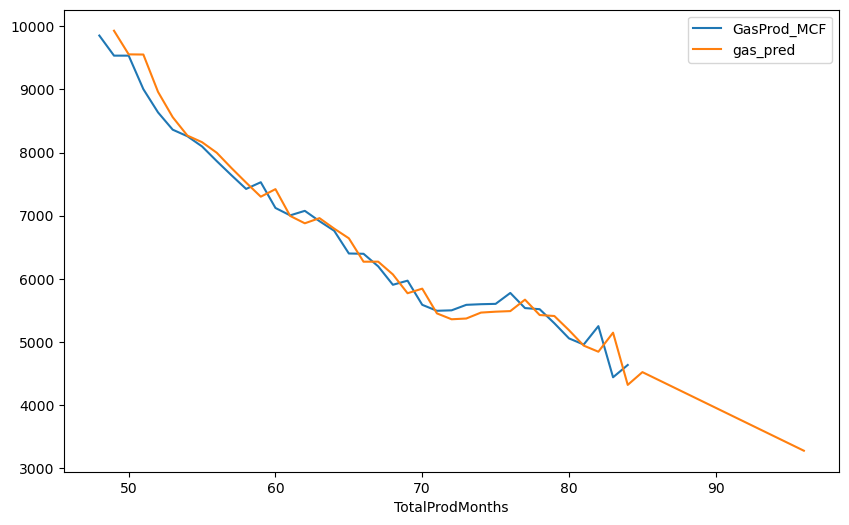

In [24]:
# Plot the actual gas production values and the predicted values
fig, ax = plt.subplots(figsize=(10, 6))  
avg_df[['GasProd_MCF']].plot(ax=ax, label='GasProd_MCF')  
concatenated_df[['gas_pred']].plot(ax=ax, label='gas_pred')  
plt.legend()  
plt.show()  

In [25]:
# Obtain the Akaike Information Criterion (AIC) value
results_gas.aic

502.293038319442

# Additional model

# Data

In [26]:
# Import 
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.regularizers import L2
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

#### Exploratory Data Analysis



In [27]:
# Read production data Excel file
production_data_df = pd.read_excel(datapath/ Path('Production Data.xlsx'))
# Read metadata Excel file
metadata_df = pd.read_excel(datapath/ Path('Metadata.xlsx'))


In [28]:
# merged files
metadata_columns_to_keep = ['API_UWI'] + [col for col in metadata_df.columns if col not in production_data_df.columns]
metadata_df_selected = metadata_df[metadata_columns_to_keep]
merged_df = pd.merge(production_data_df, metadata_df_selected, on='API_UWI', how='inner')

In [29]:
# sort df
sort_df = merged_df.sort_values(by=['API_UWI', 'TotalProdMonths'])

In [30]:
# drop duplicates and drop NA columns
sort_df = sort_df.loc[:, ~sort_df.columns.duplicated()]
sort_df = sort_df.dropna(axis=1, how='all')

In [31]:
# Select columns to use and remain these columns
columns_keep = [    'API_UWI','TotalProdMonths', 'CumProd_BOE', 'CumProd_MCFE', 'CumLiquids_BBL',
                    'CumGas_MCF', 'CumWater_BBL', 'CDProd_BOEPerDAY',
                    'CDProd_MCFEPerDAY', 'CDLiquids_BBLPerDAY', 'CDGas_MCFPerDAY',
                    'CDWater_BBLPerDAY', 'PDProd_BOEPerDAY', 'PDProd_MCFEPerDAY',
                    'PDLiquids_BBLPerDAY', 'PDGas_MCFPerDAY', 'PDWater_BBLPerDAY',
                    'TVD_FT', 'MD_FT', 'LateralLength_FT',
                    'CompletionNumber', 'Latitude', 'Longitude',
                    'TotalWaterPumped_GAL', 'TotalFluidPumped_BBL', 'Proppant_LBS',
                    'PerfInterval_FT', 'ProppantIntensity_LBSPerFT',
                    'WaterIntensity_GALPerFT'
                ]
df = sort_df[columns_keep]

In [32]:
# Check NA and drop the columns that have too many NA
df.isna().sum()

API_UWI                          0
TotalProdMonths                  0
CumProd_BOE                      0
CumProd_MCFE                     0
CumLiquids_BBL                   0
CumGas_MCF                       0
CumWater_BBL                     0
CDProd_BOEPerDAY                 0
CDProd_MCFEPerDAY                0
CDLiquids_BBLPerDAY              0
CDGas_MCFPerDAY                  0
CDWater_BBLPerDAY                0
PDProd_BOEPerDAY                 0
PDProd_MCFEPerDAY                0
PDLiquids_BBLPerDAY              0
PDGas_MCFPerDAY                  0
PDWater_BBLPerDAY                0
TVD_FT                          63
MD_FT                         1437
LateralLength_FT                 0
CompletionNumber                 0
Latitude                         0
Longitude                        0
TotalWaterPumped_GAL          3696
TotalFluidPumped_BBL          3947
Proppant_LBS                  3111
PerfInterval_FT                438
ProppantIntensity_LBSPerFT    3577
WaterIntensity_GALPe

In [33]:
# Add mean value to some columns 
add_mean=['TVD_FT','MD_FT','TotalWaterPumped_GAL',"TotalFluidPumped_BBL",
    "Proppant_LBS",
    "PerfInterval_FT",
    "ProppantIntensity_LBSPerFT",
    "WaterIntensity_GALPerFT" ]
for col in add_mean:
    df[col].fillna(value=df[col].mean(), inplace=True)

C:\Users\79099\AppData\Local\Temp\ipykernel_8736\1761923499.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(value=df[col].mean(), inplace=True)


# Problem Solving

In [34]:
# Add mean value to some columns 
add_mean=['TVD_FT','MD_FT','TotalWaterPumped_GAL',"TotalFluidPumped_BBL",
    "Proppant_LBS",
    "PerfInterval_FT",
    "ProppantIntensity_LBSPerFT",
    "WaterIntensity_GALPerFT" ]
for col in add_mean:
    df[col].fillna(value=df[col].mean(), inplace=True)

C:\Users\79099\AppData\Local\Temp\ipykernel_8736\1761923499.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(value=df[col].mean(), inplace=True)


In [35]:
# Sort by API_UWI, totalprodmonths
df = df.sort_values(by=['API_UWI', 'TotalProdMonths'])

In [36]:
# create two sets of df, one with production related columns and the other without
exclude_cols = ['API_UWI','TotalProdMonths']
cols_to_scale_df1 = df.columns.difference(exclude_cols)
cols_to_scale_df2 = [
       'TVD_FT', 'MD_FT', 'CDLiquids_BBLPerDAY','LateralLength_FT', 'CompletionNumber',
       'Latitude', 'Longitude', 'TotalWaterPumped_GAL',
       'TotalFluidPumped_BBL', 'Proppant_LBS', 'PerfInterval_FT',
       'ProppantIntensity_LBSPerFT', 'WaterIntensity_GALPerFT']

In [37]:
# Split well id and months with the rest to scale 1 (with product related columns)
scaler1 = StandardScaler()
scaled = scaler1.fit_transform(df[cols_to_scale_df1])
df_scaled = pd.DataFrame(scaled, index=df.index, columns=cols_to_scale_df1)

df1 = pd.concat([df[exclude_cols], df_scaled], axis=1)

In [38]:
# Split well id and months with the rest to scale 2 (without product related columns)
scaler2 = StandardScaler()
scaled = scaler2.fit_transform(df[cols_to_scale_df2])
df_scaled = pd.DataFrame(scaled, index=df.index, columns=cols_to_scale_df2)

df2 = pd.concat([df[exclude_cols], df_scaled], axis=1)

In [39]:
# Create time series function for (entire) well
def create_sequences_per_well_with_time(df, target_column, time_column='TotalProdMonths', id_column='API_UWI', sort_by='TotalProdMonths', time_steps=3):
    X_seq, y_seq, time_seq = [], [], []
    wells = df[id_column].unique() 

    for well in wells:
        well_data = df[df[id_column] == well].sort_values(by=sort_by).reset_index(drop=True)
        X = well_data.drop([target_column, id_column], axis=1)  
        y = well_data[target_column]
        time = well_data[time_column]

        for i in range(len(X) - time_steps):
            X_seq.append(X.iloc[i:(i + time_steps)].values)
            y_seq.append(y.iloc[i + time_steps])
            time_seq.append(time.iloc[i + time_steps]) 

    return np.array(X_seq), np.array(y_seq), np.array(time_seq) 

In [40]:
# Create time series function for (single) well
def create_sequences_one(df, wellid, target_column, time_column='TotalProdMonths', id_column='API_UWI', sort_by='TotalProdMonths', time_steps=3):
    X_seq, y_seq, time_seq = [], [], []
    wells = df[id_column].unique() 

    for well in wells:
        if well == wellid:
            well_data = df[df[id_column] == well].sort_values(by=sort_by).reset_index(drop=True)
            X = well_data.drop([target_column, id_column], axis=1) 
            y = well_data[target_column]
            time = well_data[time_column]

            for i in range(len(X) - time_steps):
                X_seq.append(X.iloc[i:(i + time_steps)].values)
                y_seq.append(y.iloc[i + time_steps])
                time_seq.append(time.iloc[i + time_steps])  

    return np.array(X_seq), np.array(y_seq), np.array(time_seq)

In [41]:
def aic(y_test, y_pred, k):
    n = len(y_test)  
    mse = mean_squared_error(y_test, y_pred)  
    aic = n * np.log(mse) + 2 * k  
    return aic

In [42]:
# train test split df1 
X_seq1, y_seq1, time_seq1 = create_sequences_per_well_with_time(df1, 'CDLiquids_BBLPerDAY', time_steps=3)

In [43]:
indices = np.arange(X_seq1.shape[0])
train_idx, temp_idx = train_test_split(indices, test_size=0.3, random_state=42)
val_idx, test_idx = train_test_split(temp_idx, test_size=0.5, random_state=42)

X_train1, y_train1, time_train1 = X_seq1[train_idx], y_seq1[train_idx], time_seq1[train_idx]
X_val1, y_val1, time_val1 = X_seq1[val_idx], y_seq1[val_idx], time_seq1[val_idx]
X_test1, y_test1, time_test1 = X_seq1[test_idx], y_seq1[test_idx], time_seq1[test_idx]

In [44]:
# train test split df2
X_seq2, y_seq2, time_seq2 = create_sequences_per_well_with_time(df2, 'CDLiquids_BBLPerDAY', time_steps=3)

In [45]:
indices = np.arange(X_seq2.shape[0])
train_idx, temp_idx = train_test_split(indices, test_size=0.3, random_state=42)
val_idx, test_idx = train_test_split(temp_idx, test_size=0.5, random_state=42)

# Use the indices to split the sequences and times
X_train2, y_train2, time_train2 = X_seq2[train_idx], y_seq2[train_idx], time_seq2[train_idx]
X_val2, y_val2, time_val2 = X_seq2[val_idx], y_seq2[val_idx], time_seq2[val_idx]
X_test2, y_test2, time_test2 = X_seq2[test_idx], y_seq2[test_idx], time_seq2[test_idx]

In [46]:
# set model and summary 1
l2_reg = L2(0.001) 
model1 = Sequential()
model1.add(LSTM(units=50, return_sequences=True, input_shape=(3, X_train1.shape[2])))
model1.add(Dropout(0.2)) 
model1.add(LSTM(units=50, kernel_regularizer=l2_reg))
model1.add(Dropout(0.2))
model1.add(Dense(1))  # Output layer

# Compile the model
model1.compile(optimizer='adam', loss='mean_squared_error')
model1.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 50)             15600     
                                                                 
 dropout (Dropout)           (None, 3, 50)             0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 35851 (140.04 KB)
Trainable params: 35851 (140.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [47]:
# Train model 1 
history1 = model1.fit(X_train1, y_train1, epochs=100, batch_size=32, validation_data=(X_val1, y_val1), verbose=2)

Epoch 1/100

2166/2166 - 24s - loss: 0.0928 - val_loss: 0.0697 - 24s/epoch - 11ms/step
Epoch 2/100
2166/2166 - 16s - loss: 0.0693 - val_loss: 0.0621 - 16s/epoch - 8ms/step
Epoch 3/100
2166/2166 - 17s - loss: 0.0666 - val_loss: 0.0567 - 17s/epoch - 8ms/step
Epoch 4/100
2166/2166 - 16s - loss: 0.0663 - val_loss: 0.0584 - 16s/epoch - 7ms/step
Epoch 5/100
2166/2166 - 16s - loss: 0.0657 - val_loss: 0.0552 - 16s/epoch - 8ms/step
Epoch 6/100
2166/2166 - 17s - loss: 0.0646 - val_loss: 0.0557 - 17s/epoch - 8ms/step
Epoch 7/100
2166/2166 - 16s - loss: 0.0639 - val_loss: 0.0561 - 16s/epoch - 7ms/step
Epoch 8/100
2166/2166 - 17s - loss: 0.0635 - val_loss: 0.0551 - 17s/epoch - 8ms/step
Epoch 9/100
2166/2166 - 17s - loss: 0.0624 - val_loss: 0.0551 - 17s/epoch - 8ms/step
Epoch 10/100
2166/2166 - 17s - loss: 0.0619 - val_loss: 0.0575 - 17s/epoch - 8ms/step
Epoch 11/100
2166/2166 - 17s - loss: 0.0612 - val_loss: 0.0551 - 17s/epoch - 8ms/step
Epoch 12/100
2166/2166 - 16s - loss: 0.0619 - val_loss: 0.056

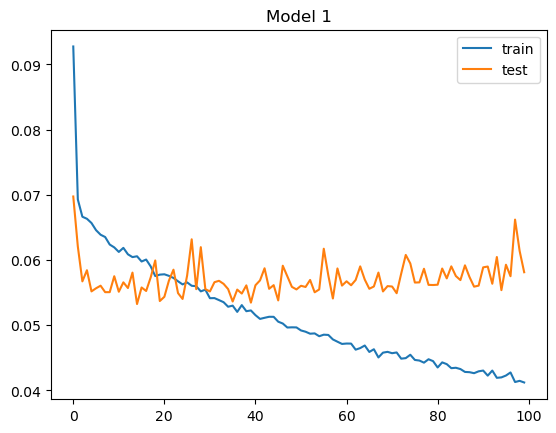

In [48]:
# history plot 1
plt.plot(history1.history['loss'], label='train')
plt.plot(history1.history['val_loss'], label='test')
plt.title("Model 1")
plt.legend()
plt.show()

In [49]:
# (single well) Reverse scale 1
selected_well_id = "30-015-38612" # Manually choose any well id from API_UWI column
X_single1, y_single1, time_single1 = create_sequences_one(df1,selected_well_id, 'CDLiquids_BBLPerDAY', time_steps=3)
y_pred_scaled = model1.predict(X_single1)
dummy_array = np.zeros((y_pred_scaled.shape[0], 27))  
dummy_array[:, 0] = y_pred_scaled.flatten() 
dummy_array_inversed = scaler1.inverse_transform(dummy_array)
y_pred1 = dummy_array_inversed[:, 0] 

dummy_array_y_test = np.zeros((y_single1.shape[0], 27))  
dummy_array_y_test[:, 0] = y_single1.flatten()  
dummy_array_y_test_inversed = scaler1.inverse_transform(dummy_array_y_test)
y_test1 = dummy_array_y_test_inversed[:, 0]  


4/4 [==============================] - 3s 7ms/step


In [50]:
# Error score 1

# Calculate mean absolute error
mae = mean_absolute_error(y_test1, y_pred1)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate mean squared error
mse = mean_squared_error(y_test1, y_pred1)
print(f'Mean Squared Error (MSE): {mse}')


# Calculate R² score
r2 = r2_score(y_test1, y_pred1)
print(f'R² score: {r2}')

Mean Absolute Error (MAE): 69.01597597251217
Mean Squared Error (MSE): 12335.84541471651
R² score: 0.7921158440384352


In [51]:
# AIC score
aic_score_1 = aic(y_test1, y_pred1, 27)
print(f"AIC Score Model 1: {aic_score_1}")

AIC Score Model 1: 1052.5480438361674


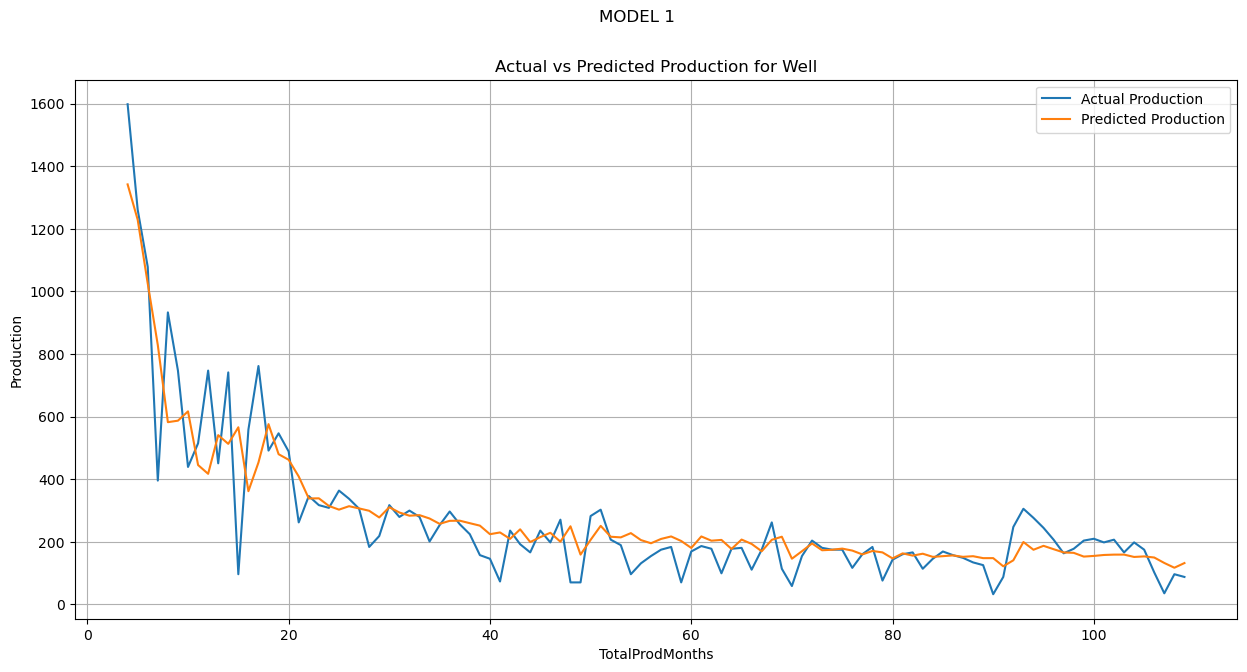

In [52]:
plt.figure(figsize=(15, 7))
plt.plot(time_single1, y_test1, label='Actual Production')
plt.plot(time_single1, y_pred1, label='Predicted Production')

plt.suptitle('MODEL 1')
plt.title("Actual vs Predicted Production for Well")
plt.xlabel('TotalProdMonths')
plt.ylabel('Production')
plt.legend()
plt.grid(True)
plt.show()

In [53]:
# set model and summary 2
l2_reg = L2(0.001) 
model2 = Sequential()
model2.add(LSTM(units=50, return_sequences=True, input_shape=(3, X_train2.shape[2])))
model2.add(Dropout(0.2)) 
model2.add(LSTM(units=50, kernel_regularizer=l2_reg))
model2.add(Dropout(0.2))
model2.add(Dense(1))  # Output layer

# Compile the model
model2.compile(optimizer='adam', loss='mean_squared_error')
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 3, 50)             12800     
                                                                 
 dropout_2 (Dropout)         (None, 3, 50)             0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 33051 (129.11 KB)
Trainable params: 33051 (129.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
# Train model 2
history2 = model2.fit(X_train2, y_train2, epochs=100, batch_size=32, validation_data=(X_val2, y_val2), verbose=2)

Epoch 1/100
2166/2166 - 25s - loss: 0.1677 - val_loss: 0.1425 - 25s/epoch - 11ms/step
Epoch 2/100
2166/2166 - 15s - loss: 0.1490 - val_loss: 0.1466 - 15s/epoch - 7ms/step
Epoch 3/100
2166/2166 - 15s - loss: 0.1450 - val_loss: 0.1343 - 15s/epoch - 7ms/step
Epoch 4/100
2166/2166 - 16s - loss: 0.1426 - val_loss: 0.1339 - 16s/epoch - 7ms/step
Epoch 5/100
2166/2166 - 15s - loss: 0.1407 - val_loss: 0.1313 - 15s/epoch - 7ms/step
Epoch 6/100
2166/2166 - 15s - loss: 0.1391 - val_loss: 0.1291 - 15s/epoch - 7ms/step
Epoch 7/100
2166/2166 - 17s - loss: 0.1367 - val_loss: 0.1249 - 17s/epoch - 8ms/step
Epoch 8/100
2166/2166 - 16s - loss: 0.1359 - val_loss: 0.1261 - 16s/epoch - 7ms/step
Epoch 9/100
2166/2166 - 15s - loss: 0.1336 - val_loss: 0.1297 - 15s/epoch - 7ms/step
Epoch 10/100
2166/2166 - 15s - loss: 0.1323 - val_loss: 0.1257 - 15s/epoch - 7ms/step
Epoch 11/100
2166/2166 - 15s - loss: 0.1313 - val_loss: 0.1219 - 15s/epoch - 7ms/step
Epoch 12/100
2166/2166 - 15s - loss: 0.1295 - val_loss: 0.1239

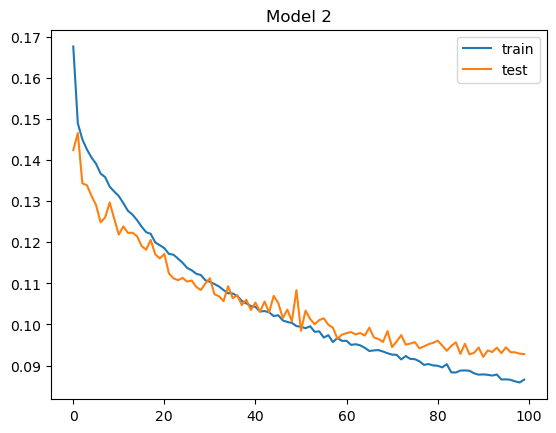

In [55]:
# history plot 2
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='test')
plt.title("Model 2")
plt.legend()
plt.show()

In [56]:
# (single well) Reverse scale 2
selected_well_id = "30-015-38612" # Manually choose any well id from API_UWI column
X_single2, y_single2, time_single2 = create_sequences_one(df2,selected_well_id, 'CDLiquids_BBLPerDAY', time_steps=3)
y_pred_scaled = model2.predict(X_single2)
dummy_array = np.zeros((y_pred_scaled.shape[0], 13))  
dummy_array[:, 0] = y_pred_scaled.flatten() 
dummy_array_inversed = scaler2.inverse_transform(dummy_array)
y_pred2 = dummy_array_inversed[:, 0] 

dummy_array_y_test = np.zeros((y_single2.shape[0], 13))  
dummy_array_y_test[:, 0] = y_single2.flatten()  
dummy_array_y_test_inversed = scaler2.inverse_transform(dummy_array_y_test)
y_test2 = dummy_array_y_test_inversed[:, 0]  


4/4 [==============================] - 1s 4ms/step


In [57]:
# Error score 2

# Calculate mean absolute error
mae = mean_absolute_error(y_test2, y_pred2)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate mean squared error
mse = mean_squared_error(y_test2, y_pred2)
print(f'Mean Squared Error (MSE): {mse}')


# Calculate R² score
r2 = r2_score(y_test2, y_pred2)
print(f'R² score: {r2}')

Mean Absolute Error (MAE): 87.32781439837741
Mean Squared Error (MSE): 17038.433165622453
R² score: 0.8227462301402364


In [58]:
# AIC score
aic_score_2 = aic(y_test2, y_pred2, 13)
print(f"AIC Score Model 2: {aic_score_2}")

AIC Score Model 2: 1058.7820456528225


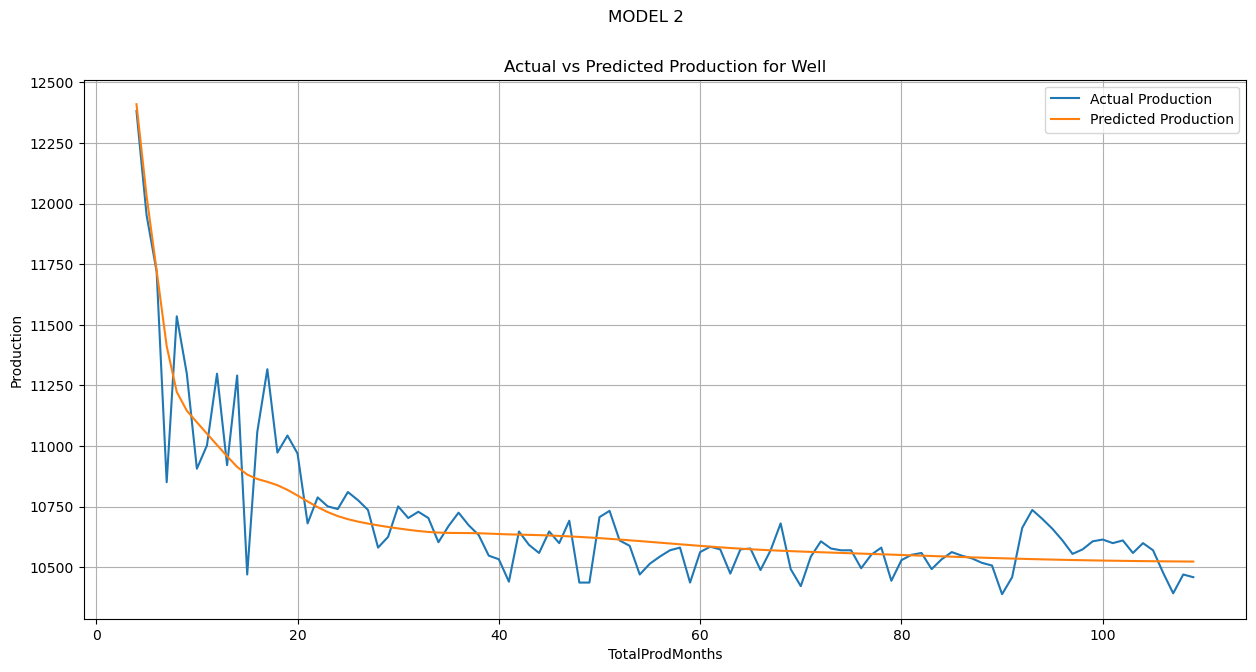

In [59]:
plt.figure(figsize=(15, 7))
plt.plot(time_single2, y_test2, label='Actual Production')
plt.plot(time_single2, y_pred2, label='Predicted Production')

plt.suptitle('MODEL 2')
plt.title("Actual vs Predicted Production for Well")
plt.xlabel('TotalProdMonths')
plt.ylabel('Production')
plt.legend()
plt.grid(True)
plt.show()

In [60]:
# Create forecast fuction 
def forecast_function(y, n_lags=3):
    df = pd.DataFrame({'y': y})
    for lag in range(1, n_lags + 1):
        df[f'lag_{lag}'] = df['y'].shift(lag)
    return df.dropna()

In [61]:
# prepair data for forecast 1

forecast_y_pred1 = np.array(y_pred1)  
forecast_df1 = forecast_function(forecast_y_pred1, n_lags=3)
X1 = forecast_df1.drop('y', axis=1)
y1 = forecast_df1['y']

In [62]:
# prepair data for forecast 2
forecast_y_pred2 = np.array(y_pred2)  
forecast_df2 = forecast_function(forecast_y_pred2, n_lags=3)
X2 = forecast_df2.drop('y', axis=1)
y2 = forecast_df2['y']

In [63]:
# Create Model for forecast 1
forecast_model1 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
forecast_model1.fit(X1, y1)

GradientBoostingRegressor(random_state=42)

In [64]:
# Create Model for forecast 2
forecast_model2 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
forecast_model2.fit(X2, y2)

GradientBoostingRegressor(random_state=42)

In [65]:
# Create list for saving forecast values 1
n_forecasts = 10
future_preds1 = []
current_features = forecast_df1.iloc[-1, 1:].values.reshape(1, -1) 
for _ in range(n_forecasts):
    next_pred = forecast_model1.predict(current_features)
    current_features = np.roll(current_features, -1)
    current_features[0, -1] = next_pred
    future_preds1.append(next_pred.item())

extended_time_single1 = np.arange(time_single1[-1] + 1, time_single1[-1] + n_forecasts + 1)


C:\Users\79099\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\79099\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\79099\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\79099\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\79099\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\79099\anaconda3\Lib\site-packages\sk

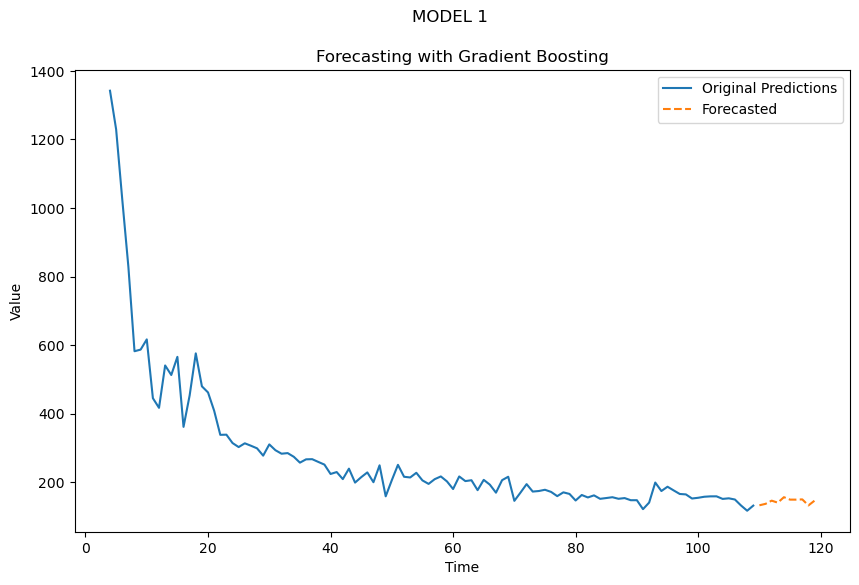

In [66]:
# plot forecast 1
plt.figure(figsize=(10, 6))
plt.plot(time_single1, y_pred1, label='Original Predictions')
plt.plot(extended_time_single1, future_preds1, label='Forecasted', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Value')
plt.suptitle("MODEL 1")
plt.title('Forecasting with Gradient Boosting')
plt.legend()
plt.show()

In [67]:
# Create list for saving forecast values 2
n_forecasts = 10 
future_preds2 = []
current_features = forecast_df2.iloc[-1, 1:].values.reshape(1, -1)  # Start with the last known lagged features

for _ in range(n_forecasts):
    next_pred = forecast_model2.predict(current_features)
    current_features = np.roll(current_features, -1)
    current_features[0, -1] = next_pred
    future_preds2.append(next_pred.item())

extended_time_single2 = np.arange(time_single2[-1] + 1, time_single2[-1] + n_forecasts + 1)

C:\Users\79099\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\79099\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\79099\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\79099\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\79099\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\79099\anaconda3\Lib\site-packages\sk

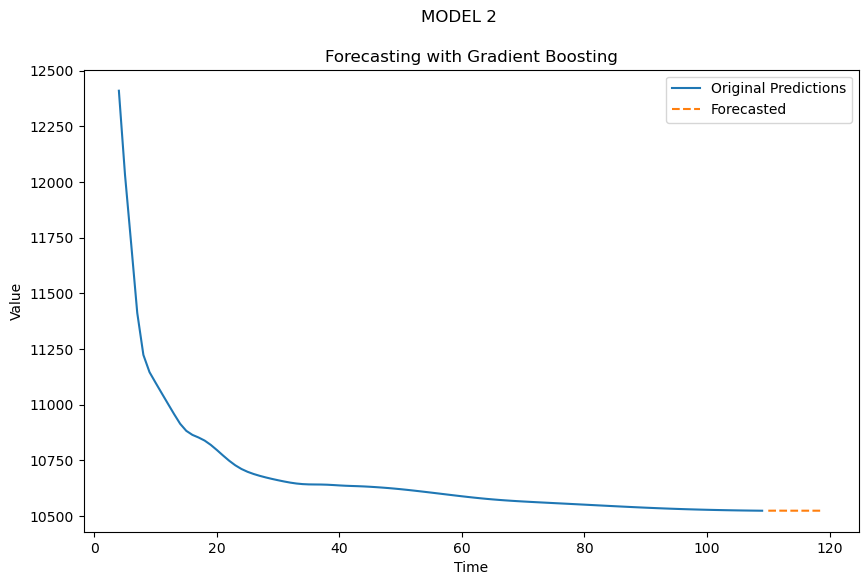

In [68]:
# plot forecast 2 
plt.figure(figsize=(10, 6))
plt.plot(time_single2, y_pred2, label='Original Predictions')
plt.plot(extended_time_single2, future_preds2, label='Forecasted', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Forecasting with Gradient Boosting')
plt.suptitle("MODEL 2")
plt.legend()
plt.show()